In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns


In [2]:
df = pd.read_csv("tabela_1_ed_sem_2019.csv", index_col=[0])

In [3]:
df.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [4]:
titles = df[["Journal", "Title", "Year"]]

In [5]:
titles.head(5)

,Journal,Title,Year
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018


# Extração das espécies

In [115]:
import re
#acrescentei [A-Z] na frente do sp. nov,pq tinham gêneros sem espécie7
titles["species"] = titles["Title"].str.findall('[A-Z]\w+ [a-z]\w+ (?:sp\. nov|sp\.nov)|[A-Z]\w+ (?:sp\. nov|sp\.nov)|[A-Z]\w+ [a-z]\w+ (?:gen\. nov|gen\.nov)|[A-Z]. \w+ (?:sp\. nov|sp\.nov)') #tenta primeiro duas palavras antes do padrão, depois uma

titles.to_csv("species.txt") #Ficou ótimo, só teve problema as espécies com nome errado no banco de dados


/home/fernando/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
titles #posso verificar quais gêneros são mais isolados em cada país, por exemplo
titles["species"].to_csv("lista_species.csv")

In [117]:
#com esse código posso ver nomes de espécies que se repetem, são poucos, e ver quais gêneros são mais frequentes
from  itertools import chain
from collections import Counter

species = pd.Series(list(chain.from_iterable(titles["species"])))
freq_species = species.value_counts()
freq_species.to_csv("freq_species.csv")


In [118]:
freq_species.head(5)

Planktothrix serta sp. nov              3
Planktothrix paucivesiculata sp. nov    3
Enterococcus sp. nov                    3
Planktothrix tepida sp. nov             3
Cronobacter dublinensis sp. nov         2
dtype: int64

# Contagem gênero - tabela corrigida

In [190]:
freq_species_ncorr_df = pd.read_csv("freq_species_v3.csv")
freq_species_ncorr_df.head(3)


,name,freq,error
0,Acidovorax oryzae sp. Nov,1,abbreviated
1,Amycolatopsis tolypomycina sp. nov,1,abbreviated
2,Amycolatopsis vancoresmycina sp. nov,1,abbreviated


In [191]:
freq_species_ncorr_df["freq"].sum()

10887

In [192]:
freq_species_ncorr_df["genus"] = freq_species_ncorr_df["name"].str.split(" ").apply(lambda x: x[0])
freq_species_ncorr_df.head(3)

,name,freq,error,genus
0,Acidovorax oryzae sp. Nov,1,abbreviated,Acidovorax
1,Amycolatopsis tolypomycina sp. nov,1,abbreviated,Amycolatopsis
2,Amycolatopsis vancoresmycina sp. nov,1,abbreviated,Amycolatopsis


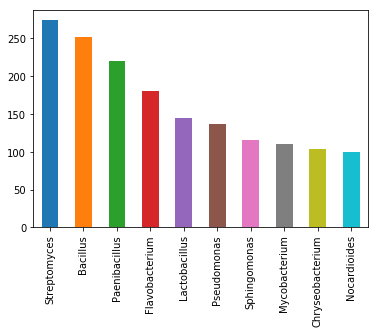

In [193]:
freq_species_ncorr_df["genus"].value_counts().head(10).plot(kind="bar")

In [194]:
freq_species_ncorr_df["genus"].value_counts().head(10).to_csv("generos.txt")

In [195]:
top_genera = pd.DataFrame(freq_species_ncorr_df["genus"].value_counts().head(10)).reset_index()
top_genera

,index,genus
0,Streptomyces,274
1,Bacillus,252
2,Paenibacillus,220
3,Flavobacterium,180
4,Lactobacillus,145
5,Pseudomonas,137
6,Sphingomonas,116
7,Mycobacterium,110
8,Chryseobacterium,103
9,Nocardioides,99


In [196]:
top_genera.columns = ["genus", "Frequency"]

In [197]:
top_genera

,genus,Frequency
0,Streptomyces,274
1,Bacillus,252
2,Paenibacillus,220
3,Flavobacterium,180
4,Lactobacillus,145
5,Pseudomonas,137
6,Sphingomonas,116
7,Mycobacterium,110
8,Chryseobacterium,103
9,Nocardioides,99


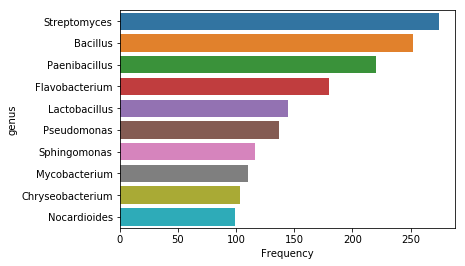

In [198]:
sns.barplot(x='Frequency', y='genus', data=top_genera)

# Correlacionar com Filos

In [199]:
filos = pd.read_csv("bac_lineages_ed.csv")

In [200]:
filos.columns = ["phylum", "class", "order", "family", "genus"]

In [201]:
filos.head(3)

,phylum,class,order,family,genus
0,NaN,NaN,NaN,NaN,Alkaligence
1,NaN,NaN,NaN,NaN,Bactoderma
2,NaN,NaN,NaN,NaN,Aegiribacteria


In [202]:
genus_counts = pd.DataFrame(freq_species_ncorr_df["genus"].value_counts()).reset_index()
genus_counts.columns = ["genus", "Frequency"]
genus_counts

,genus,Frequency
0,Streptomyces,274
1,Bacillus,252
2,Paenibacillus,220
3,Flavobacterium,180
4,Lactobacillus,145
5,Pseudomonas,137
6,Sphingomonas,116
7,Mycobacterium,110
8,Chryseobacterium,103
9,Nocardioides,99


In [203]:
filo_genus = pd.merge(genus_counts, filos, on="genus")

In [204]:
filo_genus.head(10)

,genus,Frequency,phylum,class,order,family
0,Streptomyces,274,Actinobacteria,Actinobacteria,Streptomycetales,Streptomycetaceae
1,Bacillus,252,Firmicutes,Bacilli,Bacillales,Bacillaceae
2,Paenibacillus,220,Firmicutes,Bacilli,Bacillales,Paenibacillaceae
3,Flavobacterium,180,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae
4,Lactobacillus,145,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae
5,Pseudomonas,137,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae
6,Sphingomonas,116,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae
7,Mycobacterium,110,Actinobacteria,Actinobacteria,Corynebacteriales,Mycobacteriaceae
8,Chryseobacterium,103,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae
9,Nocardioides,99,Actinobacteria,Actinobacteria,Propionibacteriales,Nocardioidaceae


In [205]:
filo_counts = pd.DataFrame(filo_genus.groupby("phylum")["Frequency"].sum())

In [206]:
filo_counts["Frequency"].sum()

10970

In [207]:
filo_counts.sort_values(by="Frequency", ascending=False)

,Frequency
phylum,
Proteobacteria,4404
Actinobacteria,2473
Firmicutes,1876
Bacteroidetes,1711
Deinococcus-Thermus,87
Spirochaetes,55
Acidobacteria,46
Verrucomicrobia,45
Chloroflexi,34


In [208]:
top_filo = filo_counts.sort_values(by="Frequency", ascending=False).head(4)

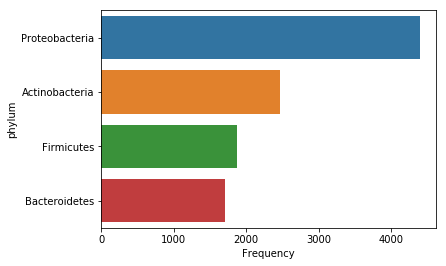

In [209]:
sns.barplot(x='Frequency', y=top_filo.index, data=top_filo)

# Verificar diferenças entre tabela dos filos e a tabela dos gêneros

In [210]:
merged = genus_counts.merge(filos, on="genus", indicator=True, how="outer")
sem_filo = merged[merged['_merge'] == 'left_only'] #251 sem filo
sem_filo.to_csv("sem_filo.csv")

# Wordclouds títulos

In [211]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter

titles = titles["Title"]
titles_cat = titles.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
titles_no_punct = titles_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(titles_no_punct.lower()) 

words_no_stops = [] 
for w in word_tokens:
    if w not in stop_words:
        words_no_stops.append(w)

In [212]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


In [213]:
words_no_stops

['leucothrix',
 'arctica',
 'sp',
 'nov',
 'isolated',
 'arctic',
 'seawater',
 'hyphobacterium',
 'indicum',
 'sp',
 'nov',
 'isolated',
 'deep',
 'seawater',
 'emended',
 'description',
 'genus',
 'hyphobacterium',
 'sphingopyxis',
 'lindanitolerans',
 'sp',
 'nov',
 'strain',
 'ws5a3pt',
 'enriched',
 'pesticide',
 'disposal',
 'site',
 'mesosutterella',
 'multiformis',
 'gen',
 'nov',
 'sp',
 'nov',
 'member',
 'family',
 'sutterellaceae',
 'sutterella',
 'megalosphaeroides',
 'sp',
 'nov',
 'isolated',
 'human',
 'faeces',
 'acinetobacter',
 'sichuanensis',
 'sp',
 'nov',
 'recovered',
 'hospital',
 'sewage',
 'china',
 'enterobacter',
 'sichuanensis',
 'sp',
 'nov',
 'recovered',
 'human',
 'urine',
 'kribbella',
 'monticola',
 'sp',
 'nov',
 'novel',
 'actinomycete',
 'isolated',
 'soil',
 'halomonas',
 'litopenaei',
 'sp',
 'nov',
 'moderately',
 'halophilic',
 'exopolysaccharide-producing',
 'bacterium',
 'isolated',
 'shrimp',
 'hatchery',
 'alsobacter',
 'soli',
 'sp',
 'nov

In [214]:
undesirable_words = ["sp", "nov", "gen", "bacterium", "bacteria", "descriptions", "emended", "isolated", "genus", "novel", "member", "description", "member", "family", "species", "proposal", "et", "al", "new"]

filtered_words = [] 
for w in words_no_stops:
    if w not in undesirable_words:
        filtered_words.append(w)

In [215]:
import numpy as np

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

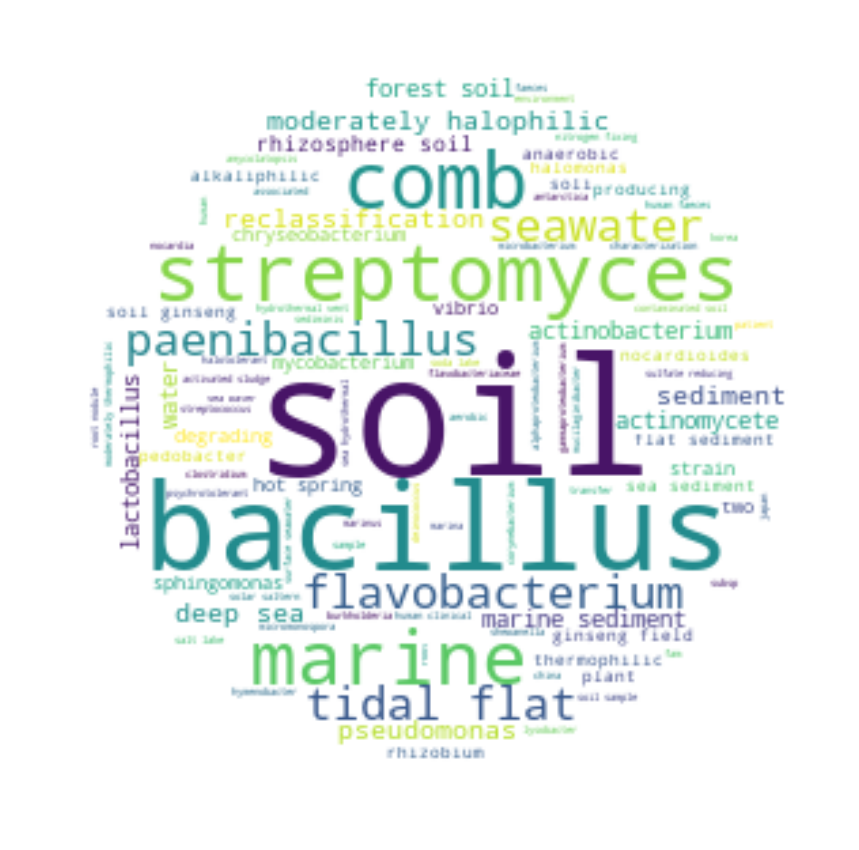

In [216]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="white", mask=mask).generate(" ".join(filtered_words))

# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()